# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [42]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
data.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [43]:

price_array = np.array(prices)
# TODO: Minimum price of the data
minimum_price = np.min(price_array)

# TODO: Maximum price of the data
maximum_price =  np.max(price_array)

# TODO: Mean price of the data
mean_price = np.mean(price_array)

# TODO: Median price of the data
median_price = np.median(price_array)

# TODO: Standard deviation of prices of the data
std_price = np.std(price_array)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

RM has coef of 179,098.59
LSTAT has coef of -17,759.05
PTRATIO has coef of -40,647.21


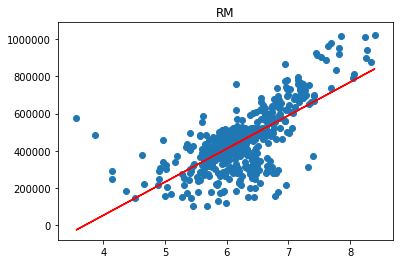

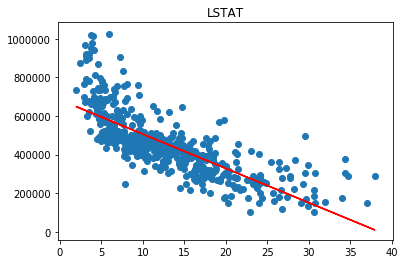

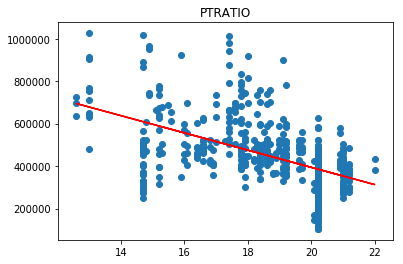

In [44]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
target = prices    
### Linear Regression from Scikit-Learn
model = LinearRegression()
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values.reshape(-1, 1)
    model.fit(x, prices)
    print('{} has coef of {:,.2f}'.format(variable, model.coef_[0]))
### Data visualization using matplotlib e numpy    
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values
    fig, ax = plt.subplots()
    fit = np.polyfit(x, target , deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    plt.title(variable)
    ax.scatter(x, target )
fig.show()

**Answer:Its a mixture of the following**
- `'RM'`: As number of room increases the value of the property should increase. Obviously. Hence **price increases with the increase of `RM`**. Also we can see the coef of `RM` is `179,098.59` which is positive and hence our assumption seems to be correct.
- `'LSTAT'`: As percentage of lower class workers increase, the area becomes lesser porsh and hence the houses in that neighborhood will be cheaper so that they can afford it. Hence **price decreases with increase of `LSTAT`**. Also we can see the coef `LSTATE` is `-17,759.05` which is negative and hence our assumption is correct.
- `'PTRATIO'`: As the ratio increases, the number of student increases compared to number of available teachers. Which means students don't get quality education thus resulting in poor growth of children in that locality which further gives rise to the fact that the economy of that locality would be poor. Hence **price decreses with increase of `PTRATIO`**. Also we can see the coef `PTRATIO` is `-40,647.21` which is negative and hence our assumption was correct.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [45]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [46]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer: Below are the answers to both the questions**

**Q1**: Yes, I believe the model has successfully captured the variation of the target variable

**Q2**: *coefficient of determination* defined by $$1-{\frac{SE_{line}}{SE_{mean}}}$$. This means higher the value of *r2* lesser was the deviation of the points from the line of regression. Hence it captures the variation more closely.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [47]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split;


# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=69, shuffle=True)
# shuffle parameter not needed as shuffle is true by default but just for documentation.

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: Basically it helps us to validate how good is the trained model. If we use only train data and have nothing to validate from it can be a case of overfitting. Its always a good idea to use a test split to evaluate how good was the training.**

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

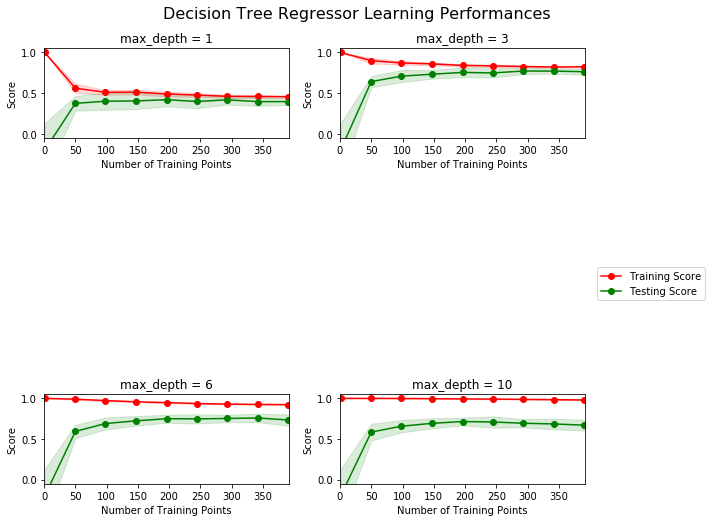

In [48]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: Choosing the graph with `max_depth = 3`**

**Q1: Answer**
- p1 *(What happens to the score of the training curve as more training points are added?)*: Since training curve is tending to a value with very less deviation, adding more points wouldn't make larger impact as the curve will remain to that point. Say for the graph in discussion (`max_depth = 3`) the training curve is tending towards `0.8`. Adding more points won't make much difference as it will stay around there.
- p2 *(What about the testing curve)*: The same argument as above is valid here. The test curve too tends towards the point `0.8` and hence adding more data won't serve any good purpose.

**Q2: Answer**
It largely depends, in this case, since both the curves has already or almost converged to a point, we already have a pretty good estimate of the score now, and the correct parameter for the model. Usually by understanding the learning curve we can pretty much guess if any more data is needed. Clearly if the two curves have converged or established a parallelism then no amount of more data can help, we then have to revision our model. Even if it has converved but the score is pretty much low (below the treshold) we still have to revision our model.

Adding more and more data is beneficial only when we haven't established a good enough relation between the learning curves. Once established adding more data won't be beneficial, infact it can backfire. The two ways I can think of it being bad is:
1. bias: It can introduce some kind of bias in the model (which I believe should be able to avoid if model is well designed)
2. too much of useless computation: All this needs heavy computation, these useless entry points will only increase computation cost and time spent in training. Which should be avoided.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

**Run the code cell below and use this graph to answer the following two questions Q5 and Q6.**

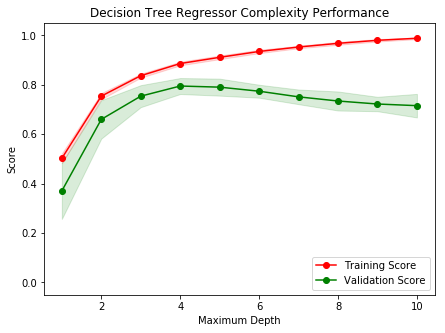

In [49]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: Answers to each question is below**

- Q1: When a model is trained with a maximum depth of 1 it suffers from **high bias**
- Q2: When a model is trained with a maximum depth of 10 it suffers from **high variance**.

In high bias (*underfitting*) neither the training score nor the test score is high but as the curves moves towards high variance (*overfitting*) the training score gets higher and higher but the validation score becomes lower and lower after reaching a sweet spot (the good balance of two).

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: Answer to each question is below**
- Q1: I think depth of 3 results in a model that best generalizes to unseen data.
- Q2: Both the curves `training score` and `validation score` reach closest. Beyond this they diverge again resulting in overfitting. Below this the curves aren't as close to each other and also the score ain't good either. So depth of `3` is the sweet spot.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:**
    Creating a solution to an ML problem requires tools. These different models like `decision tree` or `support vector machines` are nothing but these tools. These tools also have various parameters that needs to be tweaked to get a best result. Basically this tweaking is to solve the problem of fitting. We need to declare a good value for these parameters so that the resulting solution does neither `overfit` nor `underfit`. So these models can have various parameters and to tackle this problem we use **Grid Search technique**. Lets say we are using decision tree for a use case, it has various parameters like `max_depth`, `min_samples_leaf` and also many others. So we need to find a perfect combination of these to get a good enough values. Once these values are optimised with the help of grid search, we can use this better model with those parameters to optimise a learning algorithm.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer:**

**Q1**: First to understand *k-fold cross validation* we will have to understand the importance of *cross validation* as it helps us to understand the drawbacks of *grid search*. The basics of *grid search* relies on the fact that we will have to use test data to find the optimial parameters for out model so that our model does neither *underfit* not *overfit*. But using test data to create model is against the very basic of machine learning. We are supposed to keep the test data untouched as they shouldn't have any role in training our model and hence we get true evaluation. So to eleviate this problem a cross validation technique was introduced which breaks the training data further, which will act as pseudo test data for *grid search*. 

As the training data was further divided, we may lose good potential data to improve our model. Hence *k-fold cross validation* was introduced. What this does is that it creates a `k` buckets of total data and we train the model `k` times where one of the `k` buckets can be used as cross validation data making sure each time the bucket is used is not the same as before.

**Q2**: It has majorly 2 benefits.
- It doesn't use actual test data for the creation of model via *grid search* hence keeping the actual data untouched and thus facilitating more accurate evaluation of the model thus a more optimised model.
- The split made for the cross-validation doesn't go to waste as those data points will be used to train the model. Hence the entire training data is used and not just a smaller subset.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [50]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [51]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


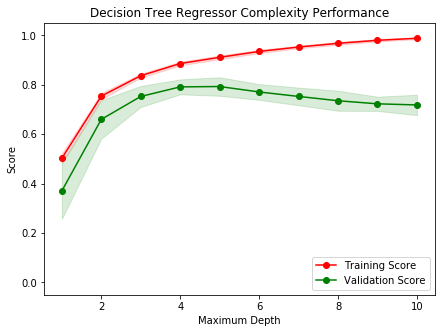

In [52]:
vs.ModelComplexity(X_train, y_train)

** Hint: ** The answer comes from the output of the code snipped above.

**Answer: 4**
This is in par of the guess made above when inspecting the `model complexity` of the model. We had seen from the curve that beyond this point the curve was diverging where the `validation score` was deteriorating meanwhile improving the `training scrore`, the classic scenario of `overfitting`. Before this point neither the score was good nor the curve seemed to converge, hence the classic scenario of `underfitting`. This max depth of 4 seemed just right.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [53]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $336,150.00
Predicted selling price for Client 2's home: $231,798.00
Predicted selling price for Client 3's home: $892,850.00


In [64]:
client_data1 = [[5, 17, 15],
               [4, 17, 15]]

client_data2 = [[5, 17, 15],
               [5, 3, 12]]


print('<<< For the first part of the below answer >>>')
for i, price in enumerate(reg.predict(client_data1)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    

print('\n<<< For the second part of the below answer >>>')
for i, price in enumerate(reg.predict(client_data2)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

<<< For the first part of the below answer >>>
Predicted selling price for Client 1's home: $336,150.00
Predicted selling price for Client 2's home: $336,150.00

<<< For the second part of the below answer >>>
Predicted selling price for Client 1's home: $336,150.00
Predicted selling price for Client 2's home: $501,972.41


**Answer**
- client 1: \$336,150.00
- client 2: \$231,798.00
- client 3: \$892,850.00

This answer also makes sense. Lets take the case of *client 1* and *client 2*. The number of room as almost similar, difference of only 1 room. As we can see above, when all the paramters made same except for the room, the predicted price was exactly the same. This this difference in price shouldn't be much but still there is a difference of **\$104,352** which is huge. This differnce was made due to `LSTAT` and `PTRATIO`. We can see the poverty percentage of *client 2* is much more greater (`32%`) when compared to *client 1* (`17%`). Also the student-teacher ratio was significantly higher (`22:1`) when compared to *client 1* (`15:1`). When these scenarios are considered and we know `LSTAT` and `PTRATIO` are inversely related to the price there this difference in prices is justified.

Also when we compare *client 1* and *client 3* we see a price difference of **\$556,700** which is almost 1.66 times higher. This huge difference is not only contributed by the difference in the number of rooms but the `LSTAT` and `PTRATIO` also has major roles in it. As we can see from the second output above, despite making the number of rooms same there was a huge difference of **\$165822.41**. This is because the poverty percentage is tremendously low and also the student teacher ratio is pretty much low. These factors together provide this compelling differnce in the price.

All this result aligns with the guess we made in starting how each feature will influence the price of the house in that neighborhood.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [65]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


Standard Deviation 21,438.75


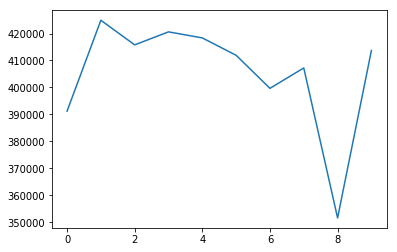

In [66]:
def customPredictTrials(X, y, fitter, data):

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)

        # Fit the data
        reg = fitter(X_train, y_train)

        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
    return prices

predicted_price = customPredictTrials(features, prices, fit_model, client_data)
price_series = pd.Series(predicted_price)
print('Standard Deviation {:,.2f}'.format(price_series.std()))
price_series.plot()


In [67]:
price_range = price_series.max() - price_series.min()
print('price range changes in terms of mean percentage {:,.2f}%'.format(price_range/price_series.mean() * 100))

price range changes in terms of mean percentage 18.09%


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: No. There are many things wrong about this model.**
1. The training data is of year 1978, about 40 years old. The economy of Boston had grown drastically and these data are obsolete as they don't represent the current economy of the country and hence not the correct price for the houses for the current times. It could have been somewhat relevant 40 years back.
2. The features of these data are very minimal. Lots of other factors like area of the plot, amenities of the house and type of house etc drive the cost of a house. These data won't reflect the actual scenario and hance the result could be entirely wrong.
3. The model itself is not rubust enough. We can see from the above graph the output varies drastically when trained randomly through different random splits with `standard deviation of 21,438.75`. Also the price range is almost `18%` of the mean rate of the predicted price. This difference is a sign of a not good model.
4. The areas of data collections also matters, some areas of the city may have entirely different pricing scheme compared to the other areas of the city, hence this generalisation based on the given features are completely wrong.
5. There can be huge costly house in a poor neighborhood. Thus the information of locality should not be the driving features to predict the price of a house rather it could be one of many features including some of the features of the house too as mentioned in point 2.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.